In [ ]:
import shutil


zip_file = '/content/schilderijen_data.zip'

output_folder = '/content/schilderijen_data/'

shutil.unpack_archive(zip_file, output_folder)


In [ ]:
from tensorflow.keras.models import load_model


simple_model = load_model('simple_model.keras')
simple_convnet = load_model('simple_convnet.keras')
feature_extractor = load_model('feature_extractor.keras')
fine_tuned_model = load_model('fine_tuned_model.keras')


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# test generator instellen
test_datagen = ImageDataGenerator(rescale=1./255)

# testset directory
test_dir = '/content/schilderijen_data/test'

# test generator creeren
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # multi-class classificatie
    shuffle=False  # niet shufflen, omdat we de testset willen evalueren
)

# Evaluatie van elk model op de testset
simple_model_score = simple_model.evaluate(test_generator)
simple_convnet_score = simple_convnet.evaluate(test_generator)
feature_extractor_score = feature_extractor.evaluate(test_generator)
fine_tuned_model_score = fine_tuned_model.evaluate(test_generator)

# scores
print(f"Simple Model Accuracy: {simple_model_score[1]}")
print(f"Simple ConvNet Accuracy: {simple_convnet_score[1]}")
print(f"Feature Extractor Accuracy: {feature_extractor_score[1]}")
print(f"Fine-Tuned Model Accuracy: {fine_tuned_model_score[1]}")




Found 401 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.7626 - loss: 0.5723
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.8769 - loss: 0.4514
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 516ms/step - accuracy: 0.9153 - loss: 0.3110
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.9408 - loss: 0.2204
Simple Model Accuracy: 0.8004987239837646
Simple ConvNet Accuracy: 0.8827930092811584
Feature Extractor Accuracy: 0.9077306985855103
Fine-Tuned Model Accuracy: 0.9351620674133301


Confusion matrix

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step


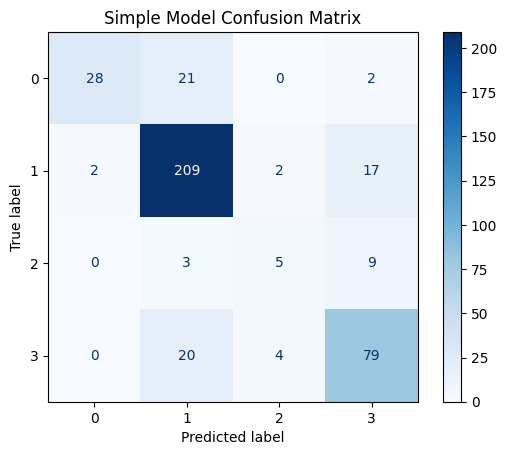

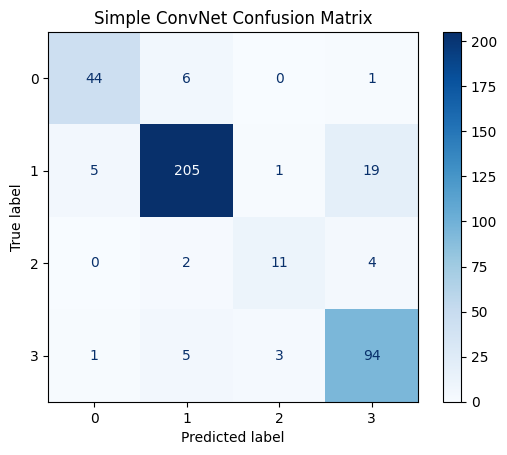

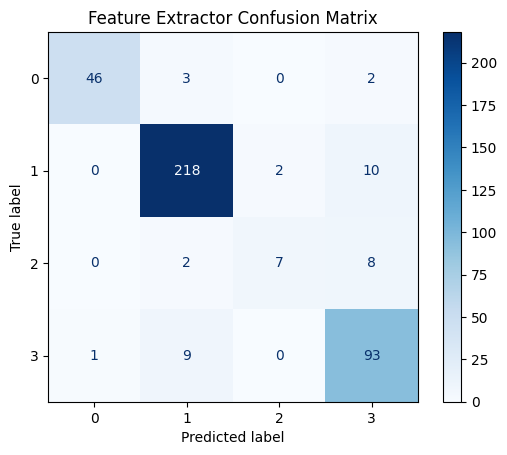

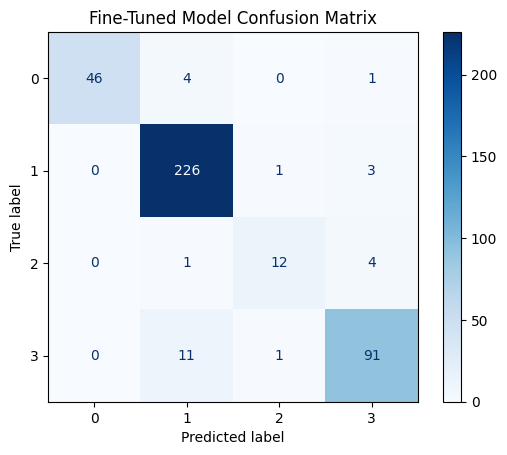

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Voorspellingen maken voor elk model
y_true = test_generator.classes  # labels
y_pred_simple_model = simple_model.predict(test_generator)
y_pred_simple_model = np.argmax(y_pred_simple_model, axis=1)  # Zet de voorspellingen om naar klassenlabels

y_pred_simple_convnet = simple_convnet.predict(test_generator)
y_pred_simple_convnet = np.argmax(y_pred_simple_convnet, axis=1)

y_pred_feature_extractor = feature_extractor.predict(test_generator)
y_pred_feature_extractor = np.argmax(y_pred_feature_extractor, axis=1)

y_pred_fine_tuned_model = fine_tuned_model.predict(test_generator)
y_pred_fine_tuned_model = np.argmax(y_pred_fine_tuned_model, axis=1)

# confusion matrix voor elk model
cm_simple_model = confusion_matrix(y_true, y_pred_simple_model)
cm_simple_convnet = confusion_matrix(y_true, y_pred_simple_convnet)
cm_feature_extractor = confusion_matrix(y_true, y_pred_feature_extractor)
cm_fine_tuned_model = confusion_matrix(y_true, y_pred_fine_tuned_model)

# Visualiseer de confusion matrix
def plot_confusion_matrix(cm, title="Confusion Matrix"):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot
plot_confusion_matrix(cm_simple_model, "Simple Model Confusion Matrix")
plot_confusion_matrix(cm_simple_convnet, "Simple ConvNet Confusion Matrix")
plot_confusion_matrix(cm_feature_extractor, "Feature Extractor Confusion Matrix")
plot_confusion_matrix(cm_fine_tuned_model, "Fine-Tuned Model Confusion Matrix")


ROC Curve

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


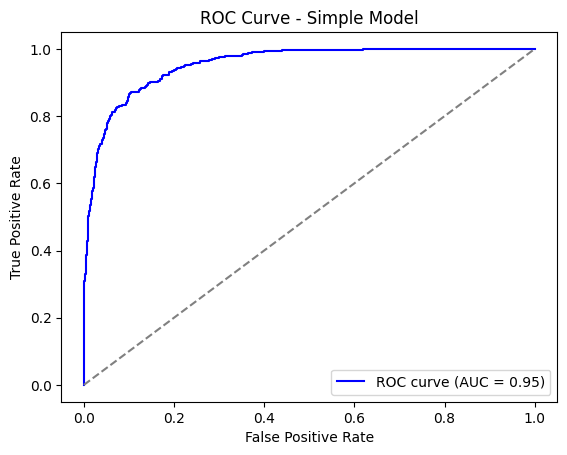

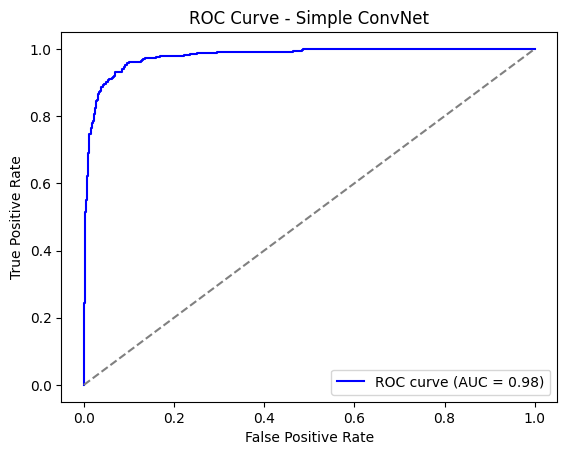

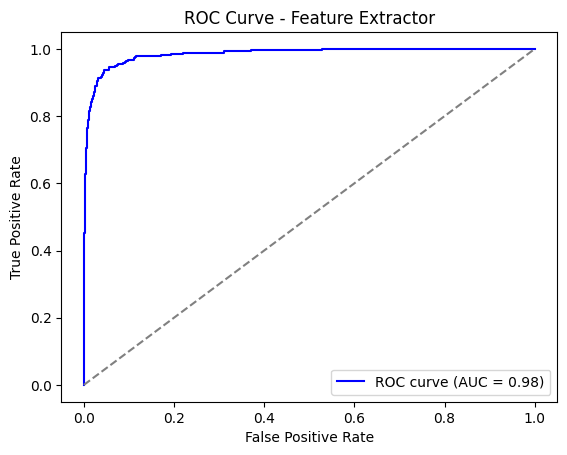

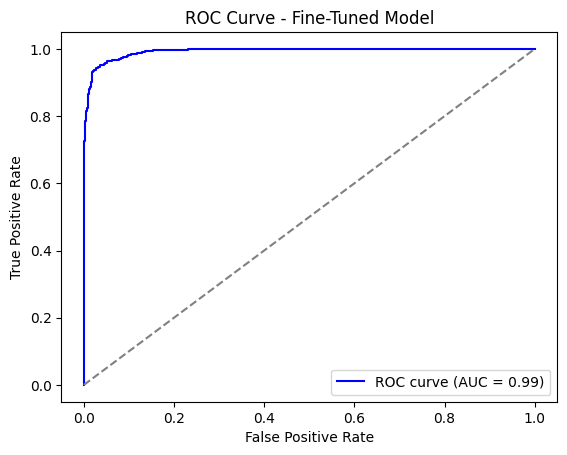

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binair maken van de labels (om meerdere klassen te ondersteunen)
y_true_bin = label_binarize(y_true, classes=np.arange(4))  # Aantal klassen is 4

# Functie om ROC-curve en AUC te plotten
def plot_roc_curve(y_true_bin, y_pred_probs, model_name):
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_probs.ravel())
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# voorspellingen voor elk model
y_pred_probs_simple_model = simple_model.predict(test_generator)
y_pred_probs_simple_convnet = simple_convnet.predict(test_generator)
y_pred_probs_feature_extractor = feature_extractor.predict(test_generator)
y_pred_probs_fine_tuned_model = fine_tuned_model.predict(test_generator)

# Plot de ROC-curves voor elk model
plot_roc_curve(y_true_bin, y_pred_probs_simple_model, "Simple Model")
plot_roc_curve(y_true_bin, y_pred_probs_simple_convnet, "Simple ConvNet")
plot_roc_curve(y_true_bin, y_pred_probs_feature_extractor, "Feature Extractor")
plot_roc_curve(y_true_bin, y_pred_probs_fine_tuned_model, "Fine-Tuned Model")


Het Finale Model Trainen:

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    '/content/schilderijen_data/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


valid_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = valid_datagen.flow_from_directory(
    '/content/schilderijen_data/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Train het beste model
best_model = fine_tuned_model


history = best_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50
)



Found 1852 images belonging to 4 classes.
Found 396 images belonging to 4 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 34s 443ms/step - accuracy: 0.8726 - loss: 0.3547 - val_accuracy: 0.9245 - val_loss: 0.2073
Epoch 2/50
 1/57 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.8438 - loss: 0.4344

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.8438 - loss: 0.4344 - val_accuracy: 1.0000 - val_loss: 0.0617
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 278ms/step - accuracy: 0.9041 - loss: 0.2510 - val_accuracy: 0.9323 - val_loss: 0.1859
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9375 - loss: 0.1438 - val_accuracy: 0.9167 - val_loss: 0.1099
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 15s 244ms/step - accuracy: 0.9201 - loss: 0.2239 - val_accuracy: 0.9323 - val_loss: 0.1929
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.9375 - loss: 0.1346 - val_accuracy: 0.9167 - val_loss: 0.5650
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 15s 244ms/step - accuracy: 0.9478 - loss: 0.1588 - val_accuracy: 0.9219 - val_loss: 0.2248
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.9688 - loss: 0.1190 - val_accuracy: 1.0000 - val_loss: 0.0185
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 16s 239ms/step - accuracy: 0.9546 - loss: 0.1320 - val_accuracy: 0.9453 - val

Evalueren van het Finale Model

In [ ]:
# Evalueer het finale model op de testset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/schilderijen_data/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Zorg ervoor dat de volgorde van de testset behouden blijft
)

# Evaluatie van het model
final_score = best_model.evaluate(test_generator)
print(f"Finale Model Accuracy: {final_score[1]}")


Found 401 images belonging to 4 classes.
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9579 - loss: 0.3512
Finale Model Accuracy: 0.9551122188568115


In [ ]:
best_model.save('final_best_model.keras')


Kleine Demo voor Gebruiker

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Functie voor het maken van een voorspelling
def predict_painting(image_path, model):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)


    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)  # Index van de hoogste voorspelling
    class_labels = list(test_generator.class_indices.keys())  # De labels van de klassen
    return class_labels[class_index]


image_path = '/content/beret.jpg'  # Vervang met het pad naar een afbeelding
predicted_painter = predict_painting(image_path, best_model)
print(f"Voorspelling: De schilder is {predicted_painter}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Voorspelling: De schilder is Rembrandt
